# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [54]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/user/Desktop/ML marathon/data/Home Credit Default Risk/'

### 之前做過的處理

In [55]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [56]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Label Encoding
> 將類別資料轉換成0,1,2,3...

In [57]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 印出來那些欄位
            print(col)
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### 將申請者年齡離散化

In [59]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['YEARS_BIRTH'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: YEARS_BIRTH, dtype: float64

#### 等寬劃分

In [60]:
app_train['equal_width_age'] = pd.cut(app_train['YEARS_BIRTH'], 10)
app_train['equal_width_age'].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: equal_width_age, dtype: int64

In [61]:
age_groups = app_train.groupby('equal_width_age')['TARGET'].mean()
age_groups.values

array([0.12201184, 0.1113895 , 0.10189956, 0.08946789, 0.07898389,
       0.07443677, 0.0679108 , 0.05592649, 0.05295286, 0.04199716])

In [62]:
age_groups.index

CategoricalIndex([(20.469, 25.378], (25.378, 30.238], (30.238, 35.099],
                  (35.099, 39.959], (39.959, 44.819], (44.819, 49.679],
                   (49.679, 54.54],    (54.54, 59.4],    (59.4, 64.26],
                   (64.26, 69.121]],
                 categories=[(20.469, 25.378], (25.378, 30.238], (30.238, 35.099], (35.099, 39.959], (39.959, 44.819], (44.819, 49.679], (49.679, 54.54], (54.54, 59.4], ...], ordered=True, name='equal_width_age', dtype='category')

Text(0.5, 1.0, 'Failure to Repay by Age Group')

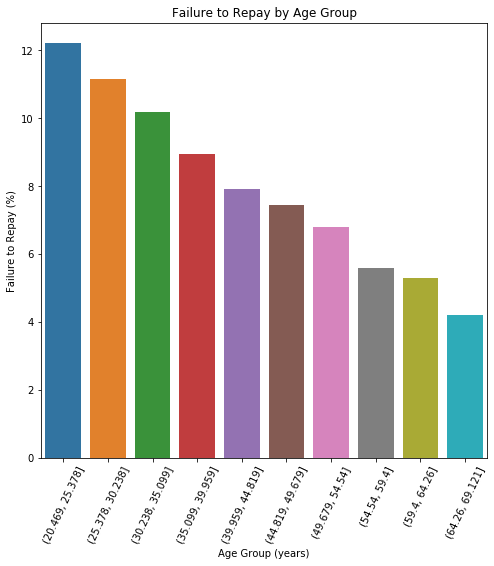

In [63]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = age_groups.index
py = age_groups.values * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 65) # 逆時針旋轉 x軸標籤~~~
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)') 
plt.title('Failure to Repay by Age Group')

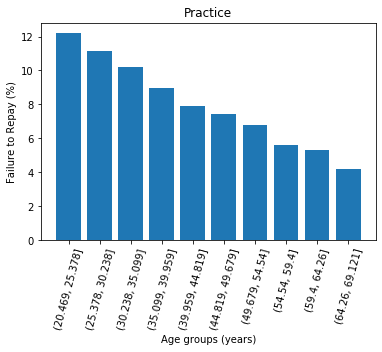

In [113]:
plt.bar(range(len(age_groups.index)), age_groups.values * 100)
plt.xticks(range(len(age_groups.index)), age_groups.index, rotation = 75)
plt.xlabel('Age groups (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Practice')
plt.show()

#### * 越年輕的申請人越容易發生借錢不還的情況

### 將申請人工作年資離散化

In [47]:
(abs(app_train['DAYS_EMPLOYED']) / 365).describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [102]:
sub_train = app_train[app_train['DAYS_EMPLOYED'].isnull() != True]
sub_train.shape

(252137, 125)

[SettingWithCopyWarning](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [105]:
# sub_train.loc[:, ('DAYS_EMPLOYED_YEARS')] = abs(sub_train['DAYS_EMPLOYED']) / 365
sub_train.loc[:, ('DAYS_EMPLOYED_YEARS')] = abs(sub_train['DAYS_EMPLOYED']) / 365

#### 等距劃分

In [96]:
sub_train.loc[:, ('equal_width_job')] = pd.cut(sub_train['DAYS_EMPLOYED_YEARS'], 10)
sub_train['equal_width_job'].value_counts()

(-0.0491, 4.907]    134392
(4.907, 9.815]       65188
(9.815, 14.722]      27932
(14.722, 19.63]      11382
(19.63, 24.537]       6563
(24.537, 29.444]      3387
(29.444, 34.352]      2027
(34.352, 39.259]       955
(39.259, 44.167]       261
(44.167, 49.074]        50
Name: equal_width_job, dtype: int64

In [84]:
job_groups = sub_train.groupby('equal_width_job')['TARGET'].mean()
job_groups.values

array([0.10614471, 0.07412407, 0.05778319, 0.04972764, 0.04738687,
       0.04074402, 0.04144055, 0.02303665, 0.01149425, 0.        ])

Text(0.5, 1.0, 'Failure to Repay by Job Group')

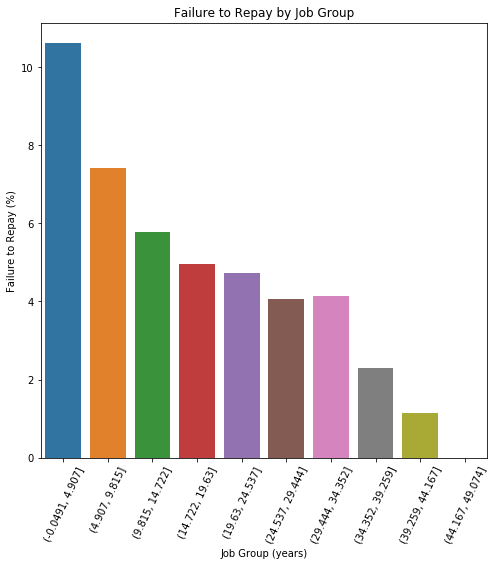

In [86]:
import seaborn as sns
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
px = job_groups.index
py = job_groups.values * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 65) # 逆時針旋轉 x軸標籤~~~
plt.xlabel('Job Group (years)')
plt.ylabel('Failure to Repay (%)') 
plt.title('Failure to Repay by Job Group')

#### 工作較不穩定的人，較傾向借錢不還。